In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
#loading .csv file
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


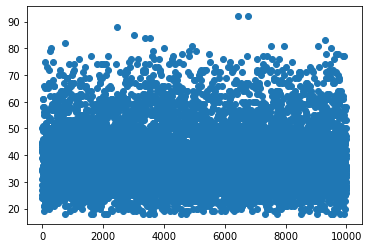

In [ ]:
plt.scatter(dataset.index,dataset['Age'])
plt.show()

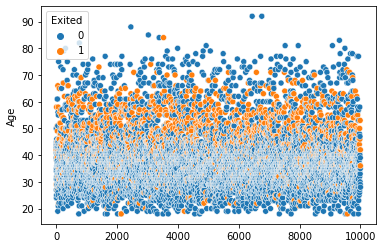

In [ ]:
sns.scatterplot(x=dataset.index,y=dataset['Age'],hue= dataset['Exited'])

Text(0, 0.5, 'Balance')

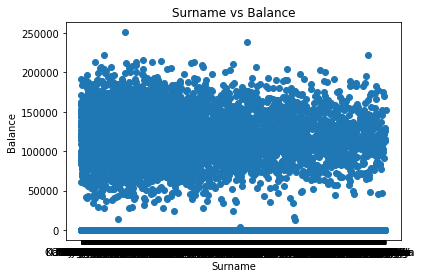

In [ ]:
#BIVARIATE ANALYSIS
plt.scatter(dataset.Surname,dataset.Balance)
plt.title('Surname vs Balance')
plt.xlabel('Surname')
plt.ylabel('Balance')

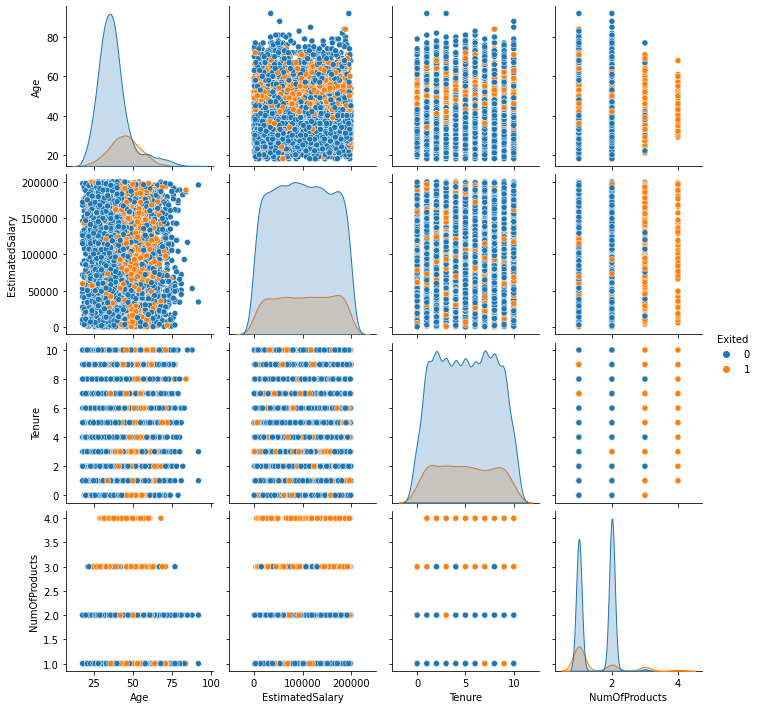

In [ ]:
#Multivariate Analysis
sns.pairplot(dataset[['Age','EstimatedSalary','Tenure','NumOfProducts','Geography','Exited']],hue='Exited')

In [ ]:
#4.Descriptive Statistics
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# 5.Missing Value Handling
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


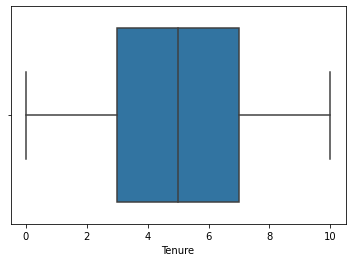

In [ ]:
#6.Outliers
sns.boxplot(dataset['Tenure'])

In [ ]:
#Replacing Outliers
Q1=dataset['Tenure'].quantile(0.10)
Q3=dataset['Tenure'].quantile(0.90)
IQR=Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=dataset['Tenure'][(dataset['Tenure']>upper_whisker)|(dataset['Tenure']<lower_whisker)].index
dataset.drop(index,inplace=True)

In [ ]:
#7-Categorical Columns
df_numeric=dataset[['RowNumber','CustomerId','Balance','NumOfProducts','EstimatedSalary',]]
df_categorical=dataset[['Geography','Gender','HasCrCard','CreditScore','Age','Tenure','IsActiveMember','Exited']]
df_numeric.head()

,RowNumber,CustomerId,Balance,NumOfProducts,EstimatedSalary
0,1,15634602,0.00,1,101348.88
1,2,15647311,83807.86,1,112542.58
2,3,15619304,159660.80,3,113931.57
3,4,15701354,0.00,2,93826.63
4,5,15737888,125510.82,1,79084.10


In [ ]:
df_categorical.head()

,Geography,Gender,HasCrCard,CreditScore,Age,Tenure,IsActiveMember,Exited
0,France,Female,1,619,42,2,1,1
1,Spain,Female,0,608,41,1,1,0
2,France,Female,1,502,42,8,0,1
3,France,Female,0,699,39,1,0,0
4,Spain,Female,1,850,43,2,1,0


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Perform Encoding
print(dataset['Surname'].unique())
print(dataset['Gender'].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['Female' 'Male']


In [ ]:
from sklearn.preprocessing import LabelEncoder
Geography_encoder=LabelEncoder()
Geography_encoder.fit(df_categorical['Geography'])
Geography_values = Geography_encoder.transform(df_categorical['Geography'])
print("Before Encoding:",list(df_categorical['Geography'][-10:]))
print("After Encoding:",Geography_values[-20:])
print("The inverse from the encoding result:",Geography_encoder.inverse_transform(Geography_values[-20:]))

Before Encoding: ['Germany', 'France', 'Spain', 'France', 'France', 'France', 'France', 'France', 'Germany', 'France']
After Encoding: [2 1 1 0 1 0 1 2 0 2 1 0 2 0 0 0 0 0 1 0]
The inverse from the encoding result: ['Spain' 'Germany' 'Germany' 'France' 'Germany' 'France' 'Germany' 'Spain'
 'France' 'Spain' 'Germany' 'France' 'Spain' 'France' 'France' 'France'
 'France' 'France' 'Germany' 'France']


In [ ]:
#8-Split Dependent And Independent Variables
X=dataset[['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
Y=dataset['Exited']

In [ ]:
X=dataset.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [ ]:
y=dataset.iloc[:, -1].values
print(y)

[1 0 1 ... 1 1 0]


In [ ]:
#9-Scale the independent Variables
from sklearn.preprocessing import scale

In [ ]:
y=scale(y)
y

array([ 1.97716468, -0.50577476,  1.97716468, ...,  1.97716468,
        1.97716468, -0.50577476])

In [ ]:
#10-Split training and testing dataset
response = dataset["Exited"]
dataset = dataset.drop(columns="Exited")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 13)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 13)
Number transactions y_test dataset:  (2000,)
